<a href="https://colab.research.google.com/github/FabriceBeaumont/MachineLearning/blob/main/LinearProgramExercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Import linear solver from Google OR-Tools 
from ortools.linear_solver import pywraplp

In [3]:
def present_solver_solution(solver):
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL: 
        print('Solution:')
        print('Objective value =', round(solver.Objective().Value(), 2))
        print('x =', round(x.solution_value(), 2))
        print('y =', round(y.solution_value(), 2))
    else: 
        print('The problem does not have an optimal solution.')

    return status

# LP Examples

## Simple maximization LP (2.1.1)

Situation: Paula works at the uni (U, 50 EUR/h) and as a tutor (T, 30 EUR/h). 

For U: Teaching material 10 pages, driving 20 km, preparation time 3 h.

For T: Teaching material 20 pages, driving 10 km, preparation time 1 h.

Limits: 160 pages, 110 km, 15 h.

Target function: Maximize income.

LP: 

$\begin{align}
\max 50x +30y \\
\text{s.t.} 10 x +20 y &\le 160\\
20 x +10 y &\le 110 \\
3 x + 1y &\le 15\\ 
x &≥ 0 \\ 
y &≥ 0
\end{align}$

In [12]:
# Instantiate a Glop solver.
solver = pywraplp.Solver.CreateSolver('GLOP')
# Create the two non-negative variables.
x = solver.NumVar(0, solver.infinity(), 'h_uni ') 
y = solver.NumVar(0, solver.infinity(), 'h_tutor')
# Page restriction.
solver.Add(10 * x + 20 * y <= 160)
# Driving restriction.
solver.Add(20 * x + 10 * y <= 110)
# Preparation time restriction.
solver.Add( 3 * x + 1 * y <= 15)
# Set as maximization problem and input target function.
solver.Maximize(50 * x + 30 * y)

In [13]:
status = present_solver_solution(solver)

Solution:
Objective value = 310.0
x = 2.0
y = 7.0


### Plot the solution

Text(0, 0.5, '$y$')

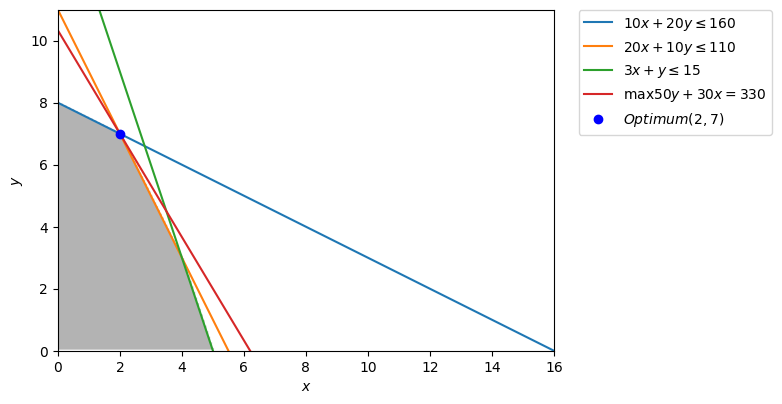

In [30]:
# Plot the feasible region.
d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)

# Plot the feasible region.
plt.imshow( ((y>=0) & (20*y<=160-10*x) & (10*y<=110-20*x) & (y<=15-3*x)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),
            origin="lower", 
            cmap="Greys", 
            alpha = 0.3);


# Plot the lines defining the constraints.
x = np.linspace(0, 16, 2000)
# 10x + 20y <= 160
y1 = (16-x)/2
# 20x + 10y <= 110
y2 = (11-2*x)
# 3x + y <= 15
y3 = 15-3*x

# Plot the lines defining the target function - with optimal values.
# 50x + 30y = b such that for x = 2.0 and y = 7.0 b = 310.0
f = -5/3 * x + 31/3

# Make plot
plt.plot(x, y1, label=r'$10x + 20y \leq 160$')
plt.plot(x, y2, label=r'$20x + 10y \leq 110$')
plt.plot(x, y3, label=r'$3x + y \leq 15$')
 
plt.plot(x, f, label=r'$\max 50 y + 30x = 330 $')
plt.plot(2, 7, 'bo', label=r'$Optimum (2,7)$')

plt.xlim(0, 16)
plt.ylim(0, 11)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

## Simple maximization LP (2.10.2)

Situation: Weekly requirements of at least 12t G, 8t M and 24t F.

Source1: Cost of 200, 6 G/d, 2 M/d,  4 F/d.
Source2: Cost of 160, 2 G/d, 2 M/d, 12 F/d.

Target: Cheapest setting to use the sources (in days, not necessarily as an integer soution required).

In [5]:
# Instantiate a Glop solver.
solver = pywraplp.Solver.CreateSolver('GLOP')
# Create the two non-negative variables.
x = solver.NumVar(0, solver.infinity(), 't_source1') 
y = solver.NumVar(0, solver.infinity(), 't_source1')
# Page restriction.
solver.Add(6 * x + 2 * y >= 12)
# Driving restriction.
solver.Add(2 * x + 2 * y >= 8)
# Preparation time restriction.
solver.Add(4 * x + 12 * y >= 24)
# Set as maximization problem and input target function.
solver.Minimize(200 * x + 160 * y)

In [6]:
status = present_solver_solution(solver)

Solution:
Objective value = 680.0
x = 1.0
y = 3.0


LP: 

$\begin{align}
\min 200x +160y \\
\text{s.t.} 6 x +2 y &\ge 12\\
2 x +2 y &\ge 8 \\
4 x + 12y &\ge 24\\ 
x &≥ 0 \\ 
y &≥ 0 \\
x &≤ 7 \\ 
y &\le 7
\end{align}$

Text(0, 0.5, '$y$')

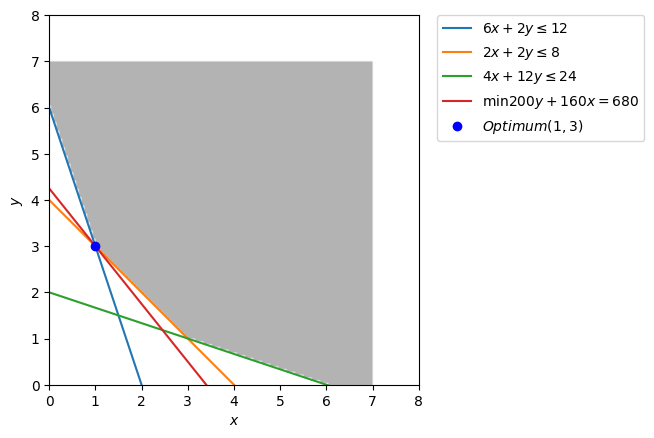

In [14]:
# Plot the feasible region.
d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)

# Plot the feasible region.
plt.imshow( ((y<=7) & (x<=7) &(2*y>=12-6*x) & (2*y>=8-2*x) & (12*y>=24-4*x)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),
            origin="lower", 
            cmap="Greys", 
            alpha = 0.3);


# Plot the lines defining the constraints.
x = np.linspace(0, 8, 200)
# 6x + 2y >= 12
y1 = (12 - 6*x)/2
# 2x + 2y <= 8
y2 = (8 - 2*x)/2
# 4x + 12y <= 24
y3 = (24 - 4*x)/12

# Plot the lines defining the target function - with optimal values.
# y = -200/160x + b such that the line intersects x = 1.0 and y = 3.0: 3+20/16 = b ==> b = 68/16
f = -20/16 * x + 68/16

# Make plot
plt.plot(x, y1, label=r'$6x + 2y\leq 12$')
plt.plot(x, y2, label=r'$2x + 2y \leq 8$')
plt.plot(x, y3, label=r'$4x + 12y \leq 24$')
 
plt.plot(x, f, label=r'$\min 200 y + 160x = 680 $')
plt.plot(1, 3, 'bo', label=r'$Optimum (1,3)$')

plt.xlim(0, 8)
plt.ylim(0, 8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

If Source1 will increase efficieny and thus reduce production costs by $k$, the solution may change as well. This changes the target function (red) and thus another optimal solution (corner of the polygon of feasable solutions) may be reached.

## Integer Linear Program

In [21]:
# Instantiate a CBC solver - for integer variables.
solver = pywraplp.Solver.CreateSolver('CBC')
# Create the two non-negative integer variables.
x = solver.IntVar(0, solver.infinity(), 'door') 
y = solver.IntVar(0, solver.infinity(), 'frame')
# Page restriction.
solver.Add( x + 3 * y <= 24)
# Driving restriction.
solver.Add( x + 10 * y <= 10)
# Preparation time restriction.
solver.Add( 4 * x + y <= 28)
# Set as maximization problem and input target function.
solver.Maximize( 50 * x + 30 * y)

status = present_solver_solution(solver)

Solution:
Objective value = 350.0
x = 7.0
y = 0.0
